In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('D:/datasets/DL/creditcard.csv')

In [4]:
# Display the first few rows and basic info
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Separate the features and the target variable
X = data.drop(columns=['Time', 'Class'])  # Drop 'Time' and 'Class'
y = data['Class']  # Target variable (1 for fraud, 0 for normal)

In [7]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Use only normal transactions for training
X_train = X_scaled[y == 0]

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
def create_autoencoder(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(14, activation='relu'))  # Encoder
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(14, activation='relu'))  # Decoder
    model.add(layers.Dense(input_shape[0], activation='sigmoid'))  # Output
    return model

In [11]:
# Create the autoencoder
autoencoder = create_autoencoder((X_train.shape[1],))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          validation_split=0.2,
                          shuffle=True)


Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0038 - val_loss: 0.8621
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8400 - val_loss: 0.8450
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8329 - val_loss: 0.8323
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8271 - val_loss: 0.8189
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8026 - val_loss: 0.8139
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8064 - val_loss: 0.8092
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7980 - val_loss: 0.8047
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7865 - val_loss: 0.7995
Epoch 9/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7946 - val_loss: 0.7955
Epoch 10/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7858 - val_loss: 0.7926
Epoch 11/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7876 - val_loss: 0.7910
Epoch 12/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [13]:
# Use the model to predict on the whole dataset
X_scaled_all = scaler.transform(X)  # Scale all data
reconstructions = autoencoder.predict(X_scaled_all)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 9s 999us/step


In [14]:
# Calculate the reconstruction error
mse = np.mean(np.power(X_scaled_all - reconstructions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # 95th percentile

# Identify anomalies
anomalies = mse > threshold
print(f'Number of anomalies detected: {np.sum(anomalies)}')


Number of anomalies detected: 14241


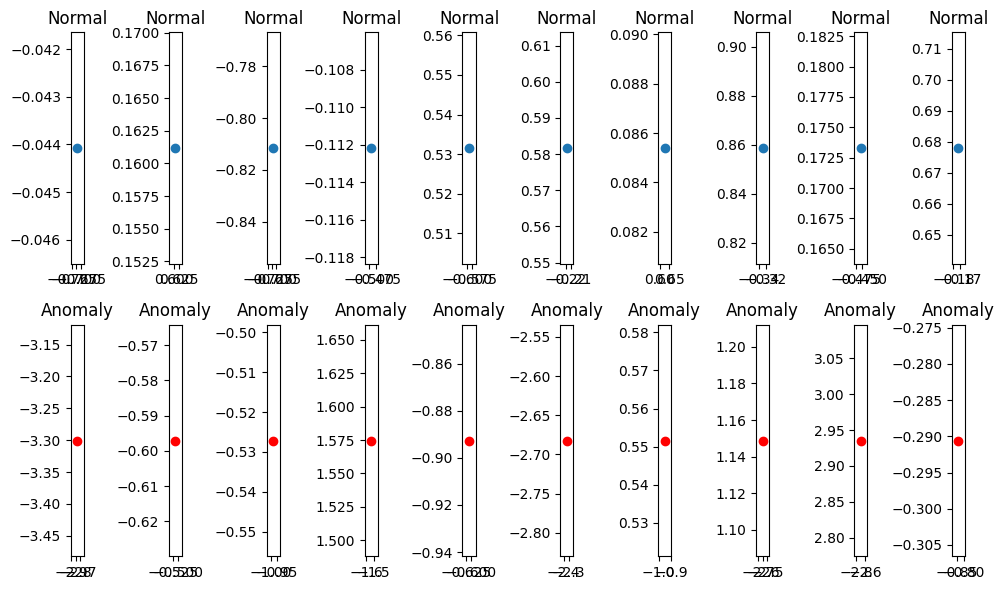

In [15]:
# Visualize some examples of normal and anomalous transactions
normal_indices = np.where(y == 0)[0][:10]
anomalous_indices = np.where(anomalies)[0][:10]

plt.figure(figsize=(10, 6))
for i, idx in enumerate(normal_indices):
    plt.subplot(2, 10, i + 1)
    plt.scatter(X_scaled_all[idx, 0], X_scaled_all[idx, 1])
    plt.title('Normal')

for i, idx in enumerate(anomalous_indices):
    plt.subplot(2, 10, i + 11)
    plt.scatter(X_scaled_all[idx, 0], X_scaled_all[idx, 1], color='red')
    plt.title('Anomaly')

plt.tight_layout()
plt.show()


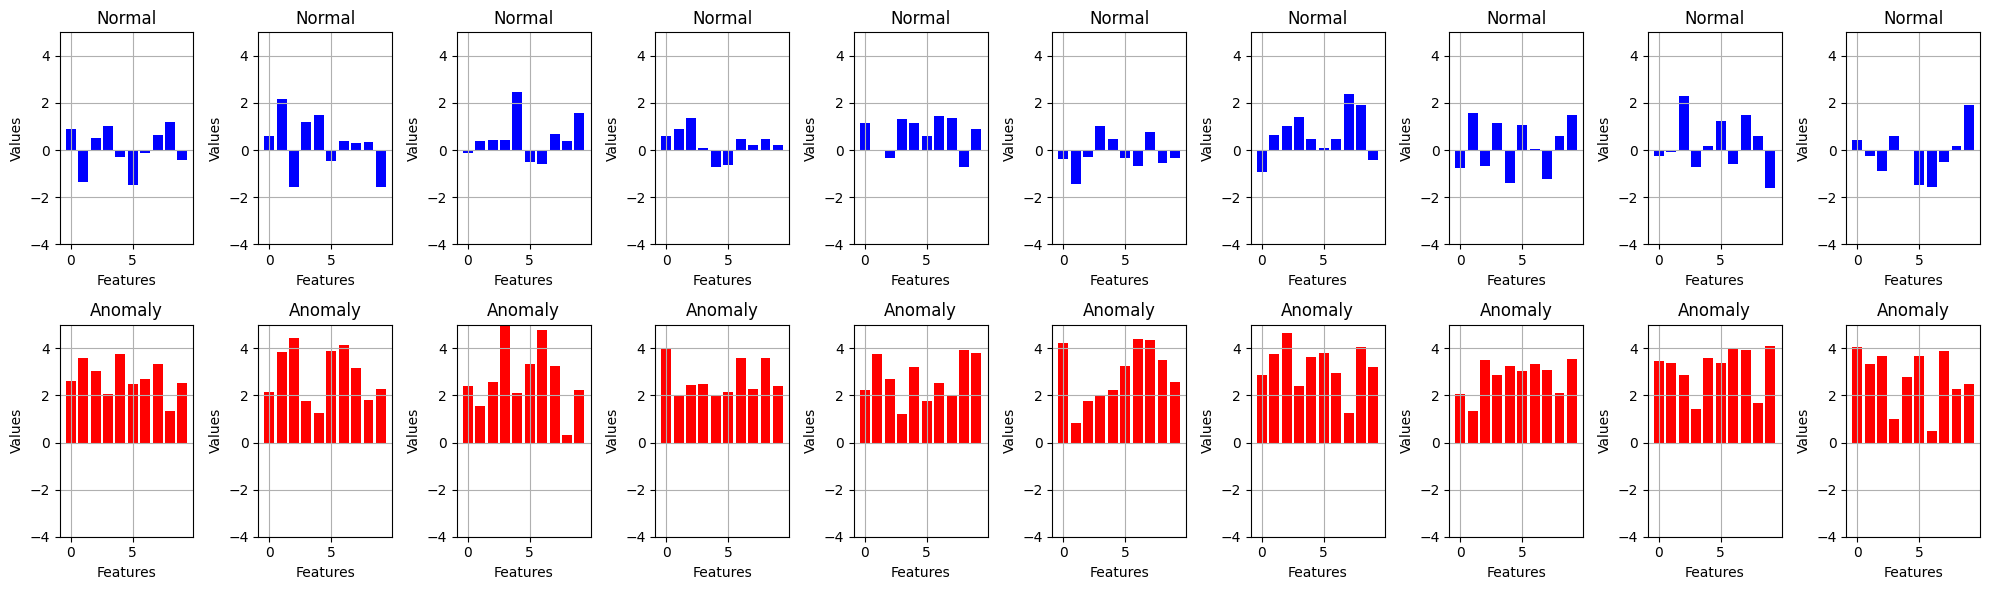

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
# Assuming 'normal_values' and 'anomaly_values' are numpy arrays of shape (n_samples, n_features)
normal_values = np.random.normal(size=(10, 10))  # Replace with actual normal values
anomaly_values = np.random.normal(loc=3, size=(10, 10))  # Replace with actual anomaly values

# Create a figure and axes
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

# Plot normal values
for i in range(10):
    axes[0, i].bar(range(normal_values.shape[1]), normal_values[i], color='blue')
    axes[0, i].set_title('Normal')
    axes[0, i].set_ylim([-4, 5])  # Adjust y-axis limit for better visibility
    axes[0, i].grid()

# Plot anomaly values
for i in range(10):
    axes[1, i].bar(range(anomaly_values.shape[1]), anomaly_values[i], color='red')
    axes[1, i].set_title('Anomaly')
    axes[1, i].set_ylim([-4, 5])  # Adjust y-axis limit for better visibility
    axes[1, i].grid()

# Add labels
for ax in axes.flatten():
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()


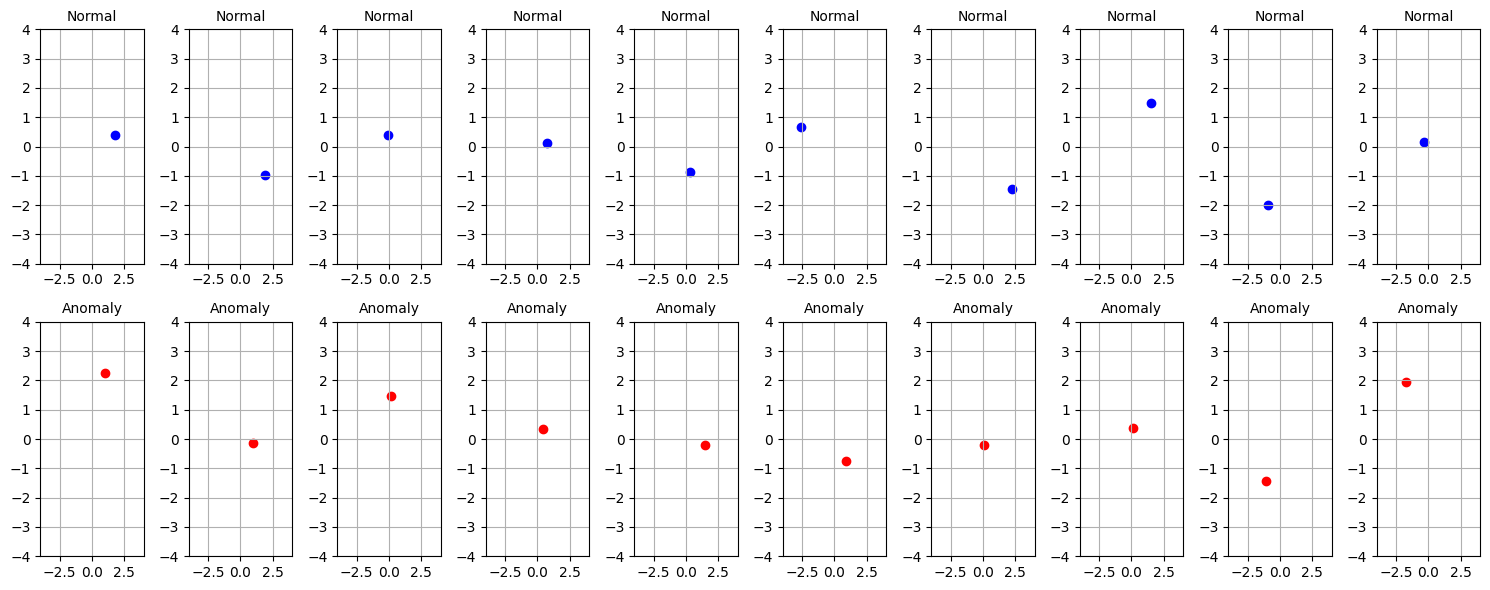

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration purposes (replace these with actual data)
np.random.seed(0)
X_scaled_all = np.random.normal(size=(100, 2))  # Simulated feature data
y = np.random.choice([0, 1], size=100)  # Normal (0) and anomalous (1) labels
anomalies = (y == 1)  # Anomalies are those where y == 1

# Get indices for normal and anomalous transactions
normal_indices = np.where(y == 0)[0][:10]  # First 10 normal transactions
anomalous_indices = np.where(anomalies)[0][:10]  # First 10 anomalies

# Create a plot
plt.figure(figsize=(15, 6))

# Plot normal transactions
for i, idx in enumerate(normal_indices):
    plt.subplot(2, 10, i + 1)
    plt.scatter(X_scaled_all[idx, 0], X_scaled_all[idx, 1], color='blue')
    plt.title('Normal', fontsize=10)
    plt.xlim(-4, 4)  # Set x-axis limit for better visibility
    plt.ylim(-4, 4)  # Set y-axis limit for better visibility
    plt.grid()

# Plot anomalous transactions
for i, idx in enumerate(anomalous_indices):
    plt.subplot(2, 10, i + 11)
    plt.scatter(X_scaled_all[idx, 0], X_scaled_all[idx, 1], color='red')
    plt.title('Anomaly', fontsize=10)
    plt.xlim(-4, 4)  # Set x-axis limit for better visibility
    plt.ylim(-4, 4)  # Set y-axis limit for better visibility
    plt.grid()

plt.tight_layout()
plt.show()
